# Binary Classification with Pytorch

In [58]:
# Import Required libraries
import pandas as pd
import torch
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import warnings
import PIL
import PIL.Image
from PIL import Image
from torchvision import datasets, transforms


In [37]:
# Navigate to where data has been stored
train_dir = os.path.join("data_binary", "data")

In [38]:
#Check the training data
labels = os.listdir(train_dir)
labels

['antelope', 'blanks']

#### Count the number of images available for Binary classification

In [44]:
# Antelope count
antelope_img_path = os.path.join(train_dir, "antelope")
antelope_images = os.listdir(antelope_img_path)
print(f"Antelope count: {len(antelpe_images)}")

# Blanks count
blank_imgs_path = os.path.join(train_dir, "blanks")
blank_imgs = os.listdir(blank_imgs_path)
print(f"Blanks count: {len(blank_imgs)}")

Antelope count: 109
Blanks count: 140


#### Display an image

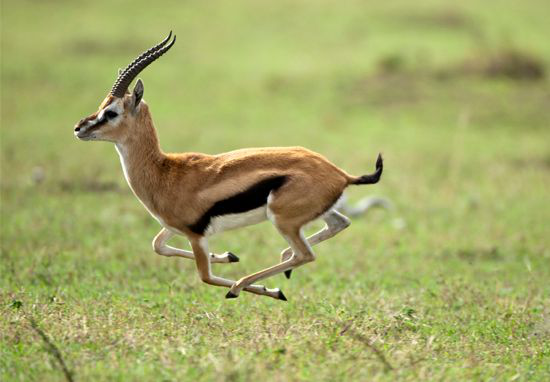

In [43]:
# Path to an antelope image
antelope_image_pic_path = antelpe_images[1]
antelope_img_pic = os.path.join(antelope_img_path, antelope_image_pic_path)
antelope_img_Pil = Image.open(antelope_img_pic)
antelope_img_Pil

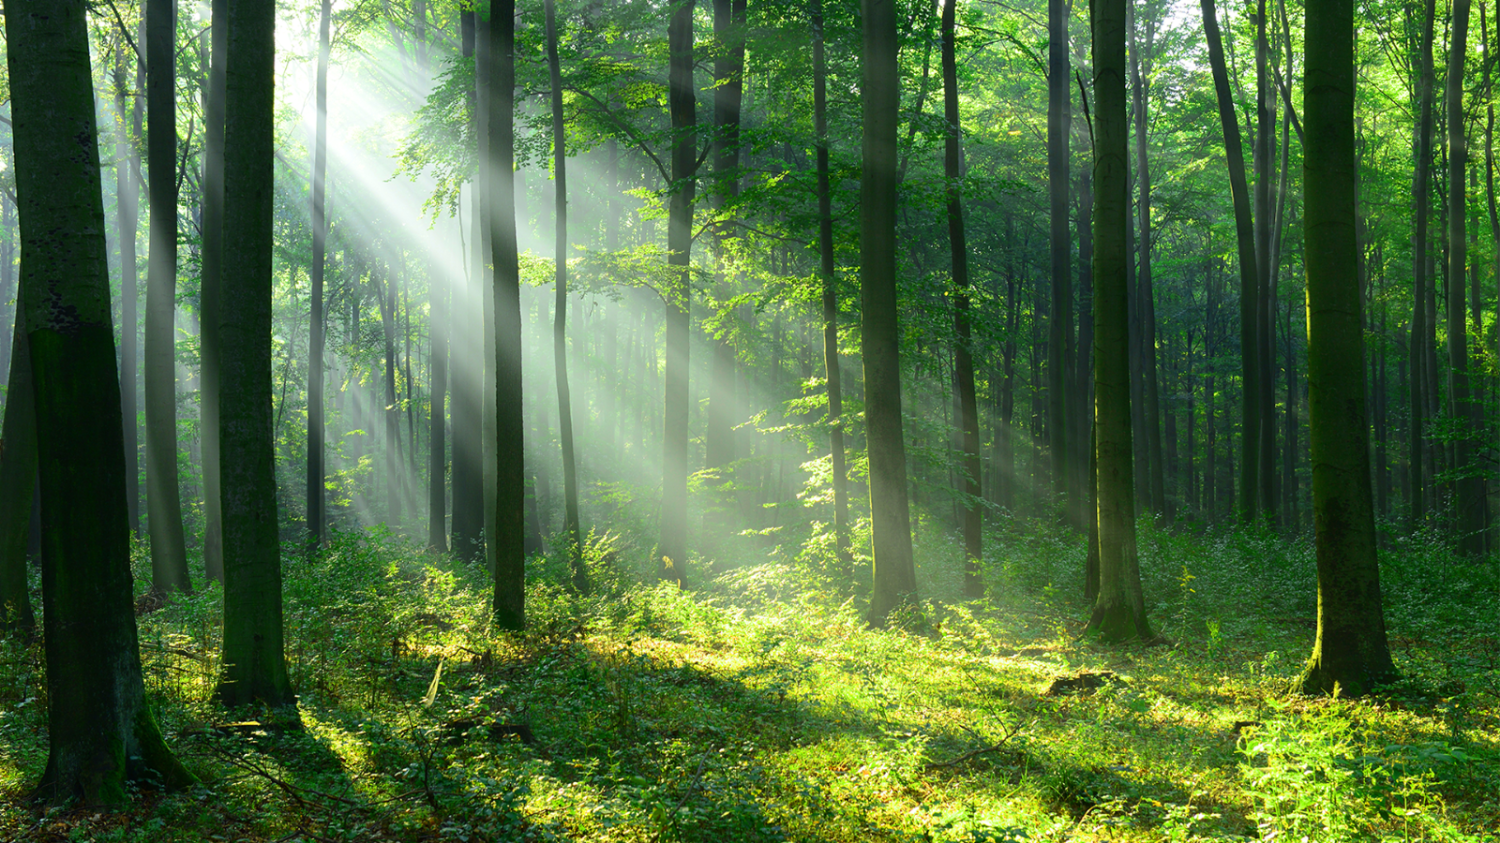

In [56]:
# Path to an empty image
blank_image_path = blank_imgs[3]
blank_image = os.path.join(blank_imgs_path, blank_image_path)
blank_image_pil = Image.open(blank_image)
blank_image_pil

In [52]:
# To determine the size and mode of the images
print(f"Antelope Image size: {antelope_img_Pil.size}")
print(f"Antelope Image mode: {antelope_img_Pil.mode}")

# Blnk images
print(f"Antelope Image size: {blank_image_pil.size}")
print(f"Antelope Image mode: {blank_image_pil.mode}")

Antelope Image size: (550, 382)
Antelope Image mode: RGB
Antelope Image size: (1200, 806)
Antelope Image mode: RGB


### Data Preparation 

We need to ensure that all the images in the dtaset are in the same mode(**RGB**). Any image that is not in this mode will be automatically converted

In [65]:
# Create RGB converter
class rgbConverter:
    def __call__(self, img):
        if img.mode != "RGB":
            img = img.convert("RGB")
        return img

### Image Transformation

For image classification with PyTorch, it is best practice to standardize (normalize) the images so that they have consistent
ranges and distributions, especially when using pretrained models.

In [66]:
# Create an image transformer
transform = transforms.Compose(
   [
       # Convert images to RGB if not aleardy 
       rgbConverter(),
       # Standadize all images to the same size
       transforms.Resize((240, 240)),

       # Convert th image to a Pytorch Tensor
       transforms.ToTensor()
   ]
)
